In [20]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import librosa
import librosa.display
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

np.set_printoptions(threshold=sys.maxsize, suppress=True)


In [22]:
import IPython
from util.draw import draw_filtered

recording_file = "/Users/duongtat/Work/_skola/VMM/tmp/7d3119ed1bb6bc9e65b3ed000.wav"
music_file = "/Users/duongtat/Work/_skola/VMM/dataset/REEBOKS OR THE NIKES [fbHxkNa7lhQ].wav"

recording, sr = librosa.load(recording_file, sr=11_025)
music, sr = librosa.load(music_file, sr=11_025)

IPython.display.Audio(recording_file)


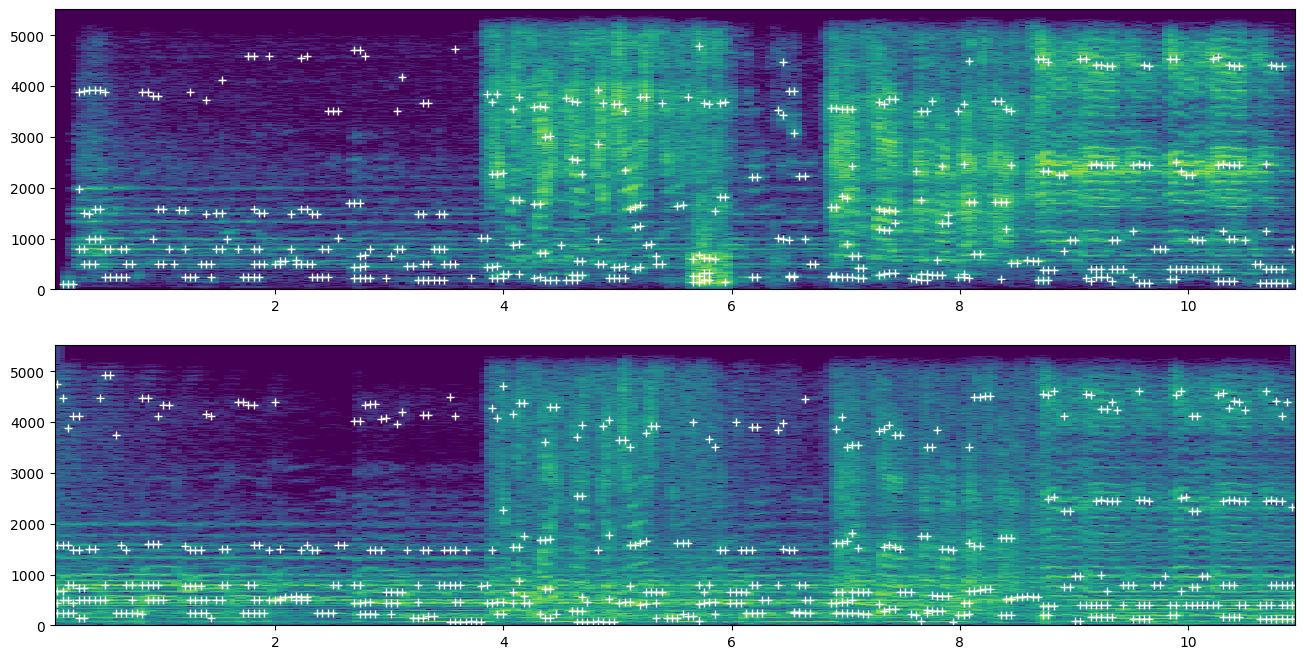

In [38]:
from freq.prominence import get_peak_frequencies_prominence as prominence
from freq.bands import get_peak_frequencies_bands as bands

fig, axs = plt.subplots(2, 1, figsize=(16, 8))

music_offset = int(sr * 4.25)
music_sample = music[music_offset: music_offset + recording.shape[-1]]

draw_filtered(
    recording, [
        (bands, {"marker": "+", "c": "w"}),
        # (prominence, {"marker": "+", "c": "r"}),
    ],
    sr=11_025,
    fig=axs[0]
)

draw_filtered(
    music_sample, [
        (bands, {"marker": "+", "c": "w"}),
        # (prominence, {"marker": "+", "c": "r"}),
    ],
    sr=11_025,
    fig=axs[1]
)

IPython.display.Audio(data=music_sample, rate=sr)


In [67]:
from hash.cluster import get_hashes_from_peaks_cluster as cluster
from hash.fanout import get_hashes_from_peaks_fanout as fanout
from util.compare import compare_fingerprints

global_params = {
    "sr": 11_025,
    "n_fft": 2048,
    "hop_length": 2048 // 4
}

cluster_kwargs = {
    "window_size": 3,
    "gap_size": 1
}

fanout_kwargs = {
    "fan_out": 100,
    "tail_size": 1
}

m_pr_cl = cluster(prominence(music, **global_params), **cluster_kwargs)
r_pr_cl = cluster(prominence(recording, **global_params), **cluster_kwargs)

m_ba_cl = cluster(bands(music, **global_params), **cluster_kwargs)
r_ba_cl = cluster(bands(recording, **global_params), **cluster_kwargs)

m_pr_fa = fanout(prominence(music, **global_params), **fanout_kwargs)
r_pr_fa = fanout(prominence(recording, **global_params), **fanout_kwargs)

m_ba_fa = fanout(bands(music, **global_params), **fanout_kwargs)
r_ba_fa = fanout(bands(recording, **global_params), **fanout_kwargs)

display(compare_fingerprints(m_pr_cl, r_pr_cl))
display(compare_fingerprints(m_ba_cl, r_ba_cl))

display(compare_fingerprints(m_pr_fa, r_pr_fa))
display(compare_fingerprints(m_ba_fa, r_ba_fa))


(50, 0.025879917184265012)

(11, 0.022964509394572025)

(17905, 0.0951128818061089)

(16570, 0.3857974388824214)

In [49]:
hash_kwargs = {
    "window_size": 1,
    "gap_size": 0
}

music_peaks = cluster(bands(music, sr=11_025), **hash_kwargs)
recording_peaks = cluster(bands(recording, sr=11_025), **hash_kwargs)
display(compare_fingerprints(music_peaks, recording_peaks))


(78, 10942, 481)